$\textsf{1.  Portfolio = short European put option $($strike $K_1 = A)$ + short European short call option $($strike $K_2 = B)$} \newline
\textsf{2.  $T$ - expiration time} \newline 
\textsf{3.  Spot price of the underlying asset $ =  S_t$ } \newline 
\textsf{4.  At the current time $S_0 = C$ }\newline
\textsf{5. $ P(S_T <= A) = D$} \newline
\textsf{5. $ S_T$ - has log-normal distribution with mean = $E$} \newline
\textsf{6. Confidence level $= 95\% $}\newline 
$


$ \textsf{ INPUT:  $A,  B, C, D, E$ } \newline
\textsf{ OUTPUT: VaR, CVar $($expected shortfall $($using the Monte Carlo method$)$}
$

In [22]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from scipy.stats import norm, lognorm
from statistics import mean
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="darkgrid")


In [3]:
A = float(input("Input A = "))
B = float(input("Input B = "))
C = float(input("Input C = "))
D = float(input("Input D = "))
E = float(input("Input E = "))
K_1 = A
K_2 = B

Input A = 50
Input B = 150
Input C = 100
Input D = 0.03
Input E = 100


$ \textsf{ 1. Find the variance of Log-normal distribution with $[$mean$]$ = B and $[$quantil D$]$ = A}$

Mean of related normal distribution distribution: 4.55
Variance of  related normal distribution distribution: 0.11

Mean of log-normal distribution : 100.00
Variance of log-normal distribution : 1211.34 => (std = 34.804)


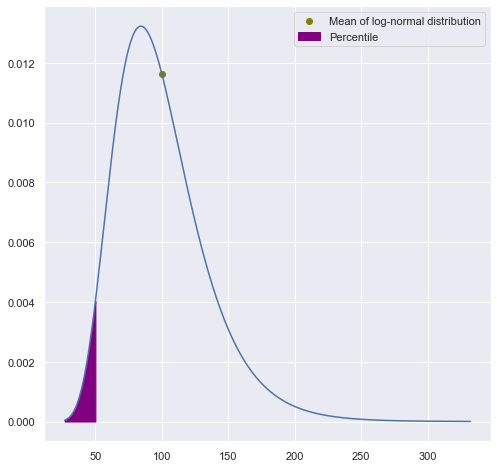

In [4]:
def show_pdf(ax, dist):
    minx, maxx = dist.ppf(0.0001), dist.ppf(0.9999)
    x = np.linspace(minx, maxx, 1000)
    sns.lineplot(color='b', x=x, y = dist.pdf(x))

    

def show_percentile_and_logmean(ax, dist, low, mean):
    minx= dist.ppf(0.0001)
    x1 = dist.ppf(low)    
    xs1 = np.linspace(minx, x1, 1000)
    ax.scatter(mean, dist.pdf(mean), color = 'olive', label = 'Mean of log-normal distribution')
    ax.fill_between(xs1, dist.pdf(xs1), color = 'purple', label = 'Percentile')
    ax.legend()
    
    

def lognorm_from_percentile_and_logmean(a, d, e):
    a = np.log(a)
    p1ppf = norm.ppf(d)
    
    sigma = 1/2*math.sqrt(4*(p1ppf)**2 - 8*a + 8*math.log(e)) + p1ppf
    mean = a - p1ppf*sigma 
        
    print("Mean of related normal distribution distribution: {:.2f}".format(mean))
    print("Variance of  related normal distribution distribution: {:.2f}".format(sigma**2))
    print()
    print("Mean of log-normal distribution : {:.2f}".format(lognorm.stats(sigma, scale = np.exp(mean), moments='m')))
    a = lognorm.stats(sigma, scale = np.exp(mean), moments='v')
    print("Variance of log-normal distribution : {:.2f} => (std = {:.3f})".format(a, a**(1/2)))

    return lognorm(s=sigma, scale = np.exp(mean))

fig, ax1 = plt.subplots(figsize=(8, 8))
dist = lognorm_from_percentile_and_logmean(A, D, E)
show_pdf(ax1, dist)
show_percentile_and_logmean(ax1, dist, D, dist.stats(moments= 'm'))

In [5]:
S_T = dist.rvs(size = 10000)
call_option = np.minimum(K_2 - S_T, 0)
put_option = np.minimum(S_T - K_1 , 0)
portfolio = call_option + put_option
data = np.array([call_option, put_option,portfolio]).T
df = pd.DataFrame(data=data, columns=["call", "put", "portfolio"])
print(df[:20])

        call       put  portfolio
0   0.000000  0.000000   0.000000
1   0.000000  0.000000   0.000000
2   0.000000  0.000000   0.000000
3   0.000000  0.000000   0.000000
4   0.000000  0.000000   0.000000
5   0.000000  0.000000   0.000000
6   0.000000  0.000000   0.000000
7   0.000000  0.000000   0.000000
8   0.000000  0.000000   0.000000
9   0.000000  0.000000   0.000000
10  0.000000  0.000000   0.000000
11  0.000000  0.000000   0.000000
12  0.000000  0.000000   0.000000
13  0.000000  0.000000   0.000000
14 -1.295406  0.000000  -1.295406
15  0.000000  0.000000   0.000000
16  0.000000 -0.968539  -0.968539
17  0.000000  0.000000   0.000000
18  0.000000  0.000000   0.000000
19  0.000000  0.000000   0.000000


In [7]:
shape_call, loc_call, scale_call = lognorm.fit(call_option)
shape_put, loc_put, scale_put = lognorm.fit(put_option)
shape_por, loc_por, scale_por = lognorm.fit(portfolio)
dist_call = lognorm(s = shape_call, loc = loc_call, scale = scale_call)
dist_put = lognorm(s = shape_put, loc = loc_put, scale = scale_put)
dist_por = lognorm(s = shape_por, loc = loc_por, scale = scale_por)
var_call = dist_call.ppf(0.05)
var_put = dist_put.ppf(0.05)
var_por = dist_por.ppf(0.05)
print("VaR 5% CALL: ",var_call)
print("VaR 5% PUT: ",var_put)
print("VaR 5% PORTFOLIO: ",var_por)

VaR 5% CALL:  -20.253646705645224
VaR 5% PUT:  -2.468438597324166
VaR 5% PORTFOLIO:  -20.52166446948104


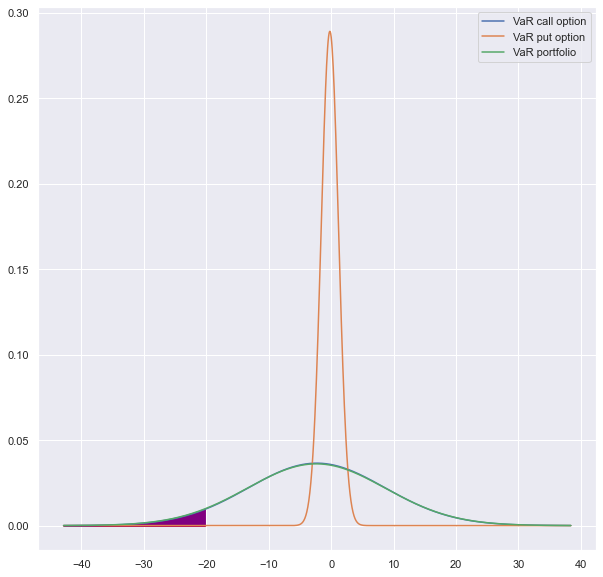

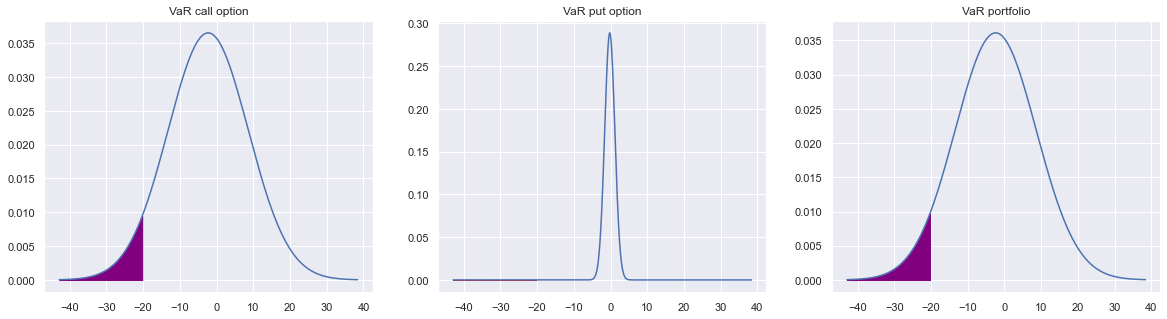

In [35]:
minx, maxx = dist_call.ppf(0.0001), dist_call.ppf(0.9999)
x = np.linspace(minx, maxx, 1000)
fig, ax2 = plt.subplots(figsize=(10, 10))
sns.lineplot(x = x, y = dist_call.pdf(x))
sns.lineplot(x = x, y = dist_put.pdf(x))
sns.lineplot(x = x, y = dist_por.pdf(x))
plt.legend(labels=['VaR call option','VaR put option','VaR portfolio' ])
minx= dist_call.ppf(0.0001)
x1 = dist_call.ppf(0.05) 
xs1 = np.linspace(minx, x1, 1000)
ax2.fill_between(xs1, dist_call.pdf(xs1), color = 'purple', label = 'Percentile')
ax2.fill_between(xs1, dist_put.pdf(xs1), color = 'red', label = 'Percentile')
ax2.fill_between(xs1, dist_por.pdf(xs1), color = 'purple', label = 'Percentile')
fig, (ax3, ax4, ax5) = plt.subplots(1,3,figsize=(20,5))
sns.lineplot(x = x, y = dist_call.pdf(x), ax = ax3)
ax3.set_title('VaR call option')
sns.lineplot(x = x, y = dist_put.pdf(x), ax = ax4)
ax4.set_title('VaR put option')
sns.lineplot(x = x, y = dist_por.pdf(x), ax = ax5)
ax5.set_title('VaR portfolio')
print()
ax3.fill_between(xs1, dist_call.pdf(xs1), color = 'purple', label = 'Percentile')
ax4.fill_between(xs1, dist_put.pdf(xs1), color = 'red', label = 'Percentile')
ax5.fill_between(xs1, dist_por.pdf(xs1), color = 'purple', label = 'Percentile')

In [36]:
data = dist_call.rvs(1000)
data = sorted(data)
print("CVaR 5% CALL: ",mean(data[:50]))
data = dist_put.rvs(1000)
data = sorted(data)
print("CVaR 5% PUT: ",mean(data[:50]))
data = dist_por.rvs(1000)
data = sorted(data)
print("CVaR 5% PORTFOLIO: ",mean(data[:50]))

CVaR 5% CALL:  -25.43610574513288
CVaR 5% PUT:  -3.1835140866009444
CVaR 5% PORTFOLIO:  -24.92538233359461
